# Combine and Clean Tabular Financial Statements Data

Merge financial statement files together

Handle outlier values of financial variables

Construct financial ratios and Z-scores

In [21]:
# Packages
import pandas as pd
import openpyxl
import numpy as np

## Load and Merge Files

In [22]:
# Inner join the three tabuler_fin_data files (columns symbol, calendarYear, period (with Q removed) from fin data)

files_to_load = [r'balance_sheet', r'cash_flow_statement', r'income_statement']

# Loop through and load or inner join each file onto merged
for i, file in enumerate(files_to_load):
    print('loading ' + file)
    df = pd.read_csv(r'~\Box\STAT 222 Capstone\Intermediate Data\Tabular_Fin\tabuler_fin_data(' + file + r').csv')
    # Delete the first column (index)
    df = df.iloc[:,1:]
    # Remove Q from period
    df['period'] = df['period'].str.replace('Q', '')
    # Convert to int
    df['period'] = df['period'].astype(int)
    # Print values of Period
    print(df['period'].unique())
    # Load or merge file
    if i == 0:
        merged = df
    else:
        merged = pd.merge(merged, df, on=['symbol', 'calendarYear', 'period', 'reportedCurrency'], how='inner')
    # Remove suffix _x
    merged.columns = merged.columns.str.replace('_x', '')
    # Harmonize suffix y
    merged.columns = merged.columns.str.replace('_y', '_' + file)
    del df
    
print('length of merged: ' + str(len(merged)))
merged.head(10)

loading balance_sheet
[3 2 1 4]
loading cash_flow_statement
[3 2 1 4]
loading income_statement
[3 2 1 4]
length of merged: 54109


,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome_income_statement,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link_income_statement,finalLink_income_statement
0,2023-09-30,BCE,CAD,718940,2023-09-30,2023-09-29 20:00:00,2023,3,"619,000,000.00",0.00,...,0.16,"243,000,000.00","687,000,000.00",0.11,0.70,0.70,"912,300,000.00","912,300,000.00",NaN,NaN
1,2023-06-30,BCE,CAD,718940,2023-06-30,2023-06-30 00:00:00,2023,2,"900,000,000.00",0.00,...,0.11,"273,000,000.00","375,000,000.00",0.06,0.37,0.37,"912,200,000.00","912,500,000.00",NaN,NaN
2,2023-03-31,BCE,CAD,718940,2023-03-31,2023-03-31 00:00:00,2023,1,"741,000,000.00",0.00,...,0.17,"270,000,000.00","771,000,000.00",0.13,0.79,0.79,"912,100,000.00","912,300,000.00",NaN,NaN
3,2022-12-31,BCE,CAD,718940,2022-12-31,2022-12-30 19:00:00,2022,4,"149,000,000.00",0.00,...,0.12,"222,000,000.00","572,000,000.00",0.09,0.58,0.58,"912,000,000.00","912,200,000.00",NaN,NaN
4,2022-09-30,BCE,CAD,718940,2022-09-30,2022-09-29 20:00:00,2022,3,"733,000,000.00",0.00,...,0.16,"178,000,000.00","715,000,000.00",0.12,0.83,0.83,"911,900,000.00","912,300,000.00",NaN,NaN
5,2022-06-30,BCE,CAD,718940,2022-06-30,2022-06-29 20:00:00,2022,2,"596,000,000.00",0.00,...,0.15,"232,000,000.00","596,000,000.00",0.10,0.69,0.69,"911,900,000.00","912,800,000.00",NaN,NaN
6,2022-03-31,BCE,CAD,718940,2022-03-31,2022-03-30 20:00:00,2022,1,"104,000,000.00",0.00,...,0.22,"335,000,000.00","877,000,000.00",0.15,1.03,1.03,"910,100,000.00","910,800,000.00",NaN,NaN
7,2021-12-31,BCE,CAD,718940,2021-12-31,2021-12-30 19:00:00,2021,4,"207,000,000.00",0.00,...,0.15,"249,000,000.00","658,000,000.00",0.11,0.69,0.69,"908,800,000.00","909,600,000.00",NaN,NaN
8,2021-09-30,BCE,CAD,718940,2021-09-30,2021-09-29 20:00:00,2021,3,"2,167,000,000.00",0.00,...,0.19,"306,000,000.00","791,000,000.00",0.14,0.83,0.83,"906,900,000.00","907,600,000.00",NaN,NaN
9,2021-06-30,BCE,CAD,718940,2021-06-30,2021-06-29 20:00:00,2021,2,"1,752,000,000.00",0.00,...,0.17,"236,000,000.00","717,000,000.00",0.13,0.76,0.76,"905,000,000.00","905,300,000.00",NaN,NaN


## Currencies and Dropping Non-USD

<Axes: xlabel='reportedCurrency'>

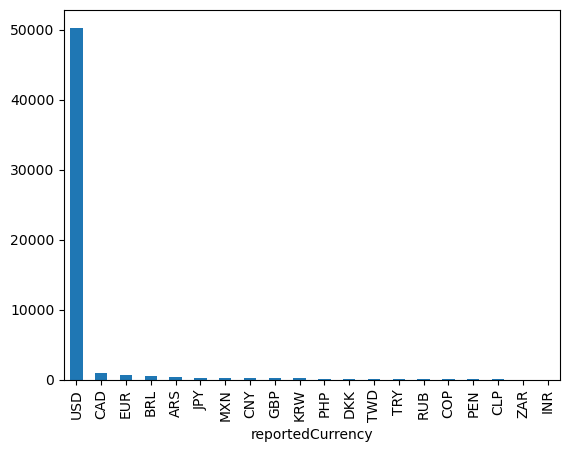

In [23]:
# Bar chart of ReportedCurrency
merged['reportedCurrency'].value_counts().plot(kind='bar')

In [24]:
# Number of currencies per company
print(merged[['symbol', 'reportedCurrency']].groupby('symbol').nunique().sort_values('reportedCurrency', ascending=False))

# Do any companies not report in USD?
all_companies = merged['symbol'].unique()
print('total companies: ' + str(len(all_companies)))
usd_companies = merged[merged['reportedCurrency'] == 'USD']['symbol'].unique()
non_usd_companies = [x for x in all_companies if x not in usd_companies]
print('never in usd companies:', len(non_usd_companies))

# Check if never in USD companies have credit rating data
# '~\Box\STAT 222 Capstone\Intermediate Data\Credit_Rating\combined_credit_rating_data.csv'
credit_ratings = pd.read_csv(r'~\Box\STAT 222 Capstone\Intermediate Data\Credit_Rating\combined_credit_rating_data.csv')
#print(credit_ratings.head(10))
credit_rating_companies = credit_ratings['Symbol'].unique()
print('never in usd companies with credit rating data:', [x for x in non_usd_companies if x in credit_rating_companies])

        reportedCurrency
symbol                  
TTM                    2
CP                     2
CCEP                   2
IMO                    2
VLRS                   2
...                  ...
FCAU                   1
FCN                    1
FCX                    1
FDP                    1
ZTS                    1

[878 rows x 1 columns]
total companies: 878
never in usd companies: 66
never in usd companies with credit rating data: ['BCE', 'CCJ', 'CVE', 'FTS', 'SJR', 'TAC', 'TECK', 'AMX', 'CNI', 'E', 'GSK', 'KOF', 'NGG', 'PHG', 'TEF', 'WPP', 'ACH', 'AMOV', 'ASML', 'BABA', 'BAK', 'BRFS', 'BTI', 'CCU', 'CPAC', 'CRESY', 'FCAU', 'FMS', 'GGB', 'HMC', 'IRCP', 'KEP', 'NOK', 'ORAN', 'PHI', 'PKX', 'PTR', 'RCI', 'SBS', 'SKM', 'SNY', 'SONY', 'TKC', 'IBA', 'ABEV', 'BTE', 'CAJ', 'CNQ', 'EC', 'GLPG', 'GRFS', 'MBT', 'NVO', 'PDS', 'PSO', 'SAP', 'SSL', 'TAK', 'TEO', 'TSM', 'UGP', 'VIV', 'VOD', 'YPF', 'IRS', 'RELX']


Only BABA never has any USD financials. Confirmed using API.

In [25]:
# are symbol by calendarYear by period ever in multiple currencies?
print(merged[['symbol', 'calendarYear', 'period', 'reportedCurrency']].drop_duplicates().groupby(['symbol', 'calendarYear', 'period']).nunique().sort_values('reportedCurrency', ascending=False))

                            reportedCurrency
symbol calendarYear period                  
AA     2015         4                      1
NWN    2022         4                      1
       2016         4                      1
       2017         1                      1
                    2                      1
...                                      ...
EXPE   2008         2                      1
                    3                      1
                    4                      1
       2009         1                      1
ZTS    2023         4                      1

[54109 rows x 1 columns]


In [26]:
print('number of symbol by calendarYear by period before USD limitation')
print(len(merged[['symbol', 'calendarYear', 'period']].drop_duplicates()))

# Drop non-USD items from merged
merged_usd = merged[merged['reportedCurrency'] == 'USD']

print('number of symbol by calendarYear by period after USD limitation')
print(len(merged_usd[['symbol', 'calendarYear', 'period']].drop_duplicates()))

# Output list of symbol by calendarYear by period lost due to USD limitation
# Outer join to find the missing ones
merged_outer_usd = pd.merge(merged, merged_usd, on=['symbol', 'calendarYear', 'period'], how='outer', indicator=True)
lost_due_to_limitation = merged_outer_usd[merged_outer_usd['_merge'] == 'left_only'][['symbol', 'calendarYear', 'period']]
lost_due_to_limitation_and_in_credit_rating = lost_due_to_limitation[lost_due_to_limitation['symbol'].isin(credit_rating_companies)]
print('length of lost_due_to_limitation_and_in_credit_rating: ' + str(len(lost_due_to_limitation_and_in_credit_rating)))
# Output to Excel
lost_due_to_limitation_and_in_credit_rating.to_excel(r'~\Box\STAT 222 Capstone\Intermediate Data\Tabular_Fin\symbol_calendarYear_period_lost_due_to_USD_limitation_and_in_credit_rating.xlsx', index=False)

number of symbol by calendarYear by period before USD limitation
54109
number of symbol by calendarYear by period after USD limitation
50283
length of lost_due_to_limitation_and_in_credit_rating: 3826


## Original Correction

Winsorizing cases where the last few digits are 0s (to handle mis-multiplication by 1,000)

In [27]:
# Before edits

# Summarize all numeric columns
# use describe method, transpose, and print all rows
# round to two decimal places, no scientific notation, commas for thousands
pd.options.display.float_format = '{:,.2f}'.format
# pandas setting to display all rows
pd.set_option('display.max_rows', None)
sum_stats_before = merged_usd.describe().T
sum_stats_before

,count,mean,std,min,25%,50%,75%,max
cik,"50,283.00","836,456.92","541,441.49",0.00,"106,640.00","915,840.00","1,257,640.00","1,915,657.00"
calendarYear,"50,283.00","2,015.16",4.85,"2,001.00","2,011.00","2,015.00","2,019.00","2,024.00"
period,"50,283.00",2.50,1.11,1.00,2.00,3.00,3.00,4.00
cashAndCashEquivalents,"50,283.00","1,321,740,109.45","6,744,360,394.63","-26,543,000,000.00","81,143,000.00","294,000,000.00","965,570,500.00","1,185,163,344,000.00"
shortTermInvestments,"50,283.00","1,330,167,677.90","63,845,497,563.92","-16,227,000,000.00",0.00,0.00,"16,000,000.00","10,000,000,000,000.00"
cashAndShortTermInvestments,"50,283.00","2,141,751,375.38","9,831,481,333.38","-26,543,000,000.00","89,100,000.00","331,000,000.00","1,137,427,500.00","1,185,163,344,000.00"
netReceivables,"50,283.00","1,907,660,797.24","9,264,229,651.48","-4,740,000,000.00","157,557,000.00","474,783,000.00","1,407,400,000.00","453,837,000,000.00"
inventory,"50,283.00","1,172,382,576.10","3,487,972,525.89","-47,199,000,000.00","45,961,000.00","290,000,000.00","1,027,888,000.00","95,057,897,000.00"
otherCurrentAssets,"50,283.00","775,915,773.64","29,863,560,174.43","-58,242,000,000.00","29,716,000.00","98,970,000.00","345,929,500.00","6,629,773,539,000.00"
totalCurrentAssets,"50,283.00","11,787,061,899.01","302,610,090,335.03","-23,384,000,000.00","585,921,000.00","1,646,236,000.00","4,485,300,000.00","31,682,176,000,000.00"


In [28]:
# Examples of extreme values - high absolute value
print(merged_usd[merged_usd['otherLiabilities'] == -448599673675132.38])

             date symbol reportedCurrency     cik fillingDate  \
34987  2008-12-31   ENIA              USD  912505  2008-12-31   

              acceptedDate  calendarYear  period  cashAndCashEquivalents  \
34987  2008-12-30 19:00:00          2008       4        1,187,497,329.97   

       shortTermInvestments  ...  incomeBeforeTaxRatio  incomeTaxExpense  \
34987        164,503,769.05  ...                  0.36    208,224,453.36   

       netIncome_income_statement  netIncomeRatio  eps  epsdiluted  \
34987              562,385,513.05            0.27 0.82        0.82   

       weightedAverageShsOut  weightedAverageShsOutDil  link_income_statement  \
34987         686,492,246.00            686,492,246.00                    NaN   

       finalLink_income_statement  
34987                         NaN  

[1 rows x 124 columns]


In [29]:
# Reset pd.set_option('display.max_rows', None) to default
pd.reset_option('display.max_rows')

In [30]:
## Because many units in the financial documents are different (in the unit of 1000 or in the unit of 1)
# We try to deal with extreme values (caused by different units in webscraping) by checking for potential mis-multiplication by 1000
def deal_with_invalid_numbers(x,lower_bound, upper_bound):
    if str(x).endswith("000.0") and (x < lower_bound or x > upper_bound):
        #Divide the value by 1000 and check if it becomes more reasonable
        return x / 1000
    else:
        return x
    
# corrected dataframe
corrected = merged_usd.copy()

# Check invalid data for every quantitative attribute 
for column in corrected.columns:
    if corrected[column].dtype == float:
        lower_bound = corrected[column].quantile(0.025)  #2.5% quantile
        upper_bound = corrected[column].quantile(0.975)  #97.5% quantile
        corrected[column] = corrected[column].apply(deal_with_invalid_numbers, args=(lower_bound, upper_bound))

In [31]:
# After edits

# Summarize all numeric columns
# use describe method, transpose, and print all rows
# round to two decimal places, no scientific notation, commas for thousands
pd.options.display.float_format = '{:,.2f}'.format
# pandas setting to display all rows
pd.set_option('display.max_rows', None)
sum_stats_after = corrected.describe().T
sum_stats_after

,count,mean,std,min,25%,50%,75%,max
cik,"50,283.00","836,456.92","541,441.49",0.00,"106,640.00","915,840.00","1,257,640.00","1,915,657.00"
calendarYear,"50,283.00","2,015.16",4.85,"2,001.00","2,011.00","2,015.00","2,019.00","2,024.00"
period,"50,283.00",2.50,1.11,1.00,2.00,3.00,3.00,4.00
cashAndCashEquivalents,"50,283.00","814,528,934.32","1,410,347,081.31","-26,543,000.00","68,878,500.00","261,408,000.00","847,000,000.00","9,342,000,000.00"
shortTermInvestments,"50,283.00","174,401,841.08","643,892,378.64","-16,227,000.00",0.00,0.00,"11,484,899.00","10,000,000,000.00"
cashAndShortTermInvestments,"50,283.00","1,075,425,516.44","2,098,484,116.68","-26,543,000.00","76,896,000.00","294,094,000.00","988,215,500.00","15,710,000,000.00"
netReceivables,"50,283.00","1,160,369,592.93","1,884,042,085.64","-4,740,000.00","138,831,500.00","429,119,000.00","1,242,000,000.00","25,628,987,268.36"
inventory,"50,283.00","781,856,614.19","1,315,576,511.60","-18,591,000,000.00","33,204,000.00","253,900,000.00","891,162,500.00","8,340,900,000.00"
otherCurrentAssets,"50,283.00","338,977,942.57","682,655,536.80","-458,543,100.00","26,000,000.00","87,900,000.00","298,000,000.00","23,149,300,000.00"
totalCurrentAssets,"50,283.00","3,791,283,444.39","6,146,224,538.99","-23,384,000.00","522,791,000.00","1,504,000,000.00","4,006,000,000.00","41,501,000,000.00"


In [32]:
# Reset pd.set_option('display.max_rows', None) to default
pd.reset_option('display.max_rows')

In [33]:
# Output sum_stats_after and sum_stats_before to Excel
sum_stats_after.to_excel(r'~\Box\STAT 222 Capstone\Intermediate Data\Tabular_Fin\sum_stats_after_original_correction.xlsx')
sum_stats_before.to_excel(r'~\Box\STAT 222 Capstone\Intermediate Data\Tabular_Fin\sum_stats_before_correction.xlsx')

# Order by symbol and output 1000 rows of corrected to Excel
corrected.sort_values(by='symbol').head(1000).to_excel(r'~\Box\STAT 222 Capstone\Intermediate Data\Tabular_Fin\original_correction_sample.xlsx')

## Construct Ratios and Z-Scores

In [34]:
# Construct EBIT from ebitda and depreciationAndAmortization_income_statement
corrected['EBIT'] = corrected['ebitda'] - corrected['depreciationAndAmortization_income_statement']
# Ratio A - EBIT / Total Assets
corrected['Ratio_A'] = corrected['EBIT'] / corrected['totalAssets']
# Ratio B - net sales / Total Assets
# revenue is closest approximation to net sales
corrected['Ratio_B'] = corrected['revenue'] / corrected['totalAssets']
# Ratio C - Market value of equity / Total Liabilities
# commonStock + preferredStock os a close approximation to market value of equity
# however, it's not a great approximation because it doesn't account for current prices and instead uses par value
corrected['common_plus_preferred_stock'] = corrected['commonStock'] + corrected['preferredStock']
corrected['Ratio_C'] = (corrected['common_plus_preferred_stock']) / corrected['totalLiabilities']
# Ratio D - Working Capital / Total Assets
# Working capital is currentAssets - currentLiabilities
corrected['workingCapital'] = corrected['totalCurrentAssets'] - corrected['totalCurrentLiabilities']
corrected['Ratio_D'] = corrected['workingCapital'] / corrected['totalAssets']
# Ratio E - Retained Earnings / Total Assets
corrected['Ratio_E'] = corrected['retainedEarnings'] / corrected['totalAssets']
# For all items, replace inf and -inf with NaN
corrected = corrected.replace([np.inf, -np.inf], np.nan)
# Altman Z-Score
# To avoid multicollinearity, be sure to drop ratios if using Z-Score in a model
corrected['Altman_Z'] = 3.3 * corrected['Ratio_A'] + 0.99 * corrected['Ratio_B'] + 0.6 * corrected['Ratio_C'] + 1.2 * corrected['Ratio_D'] + 1.4 * corrected['Ratio_E']

C:\Users\ijyli\AppData\Local\Temp\ipykernel_24440\3802163719.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corrected['EBIT'] = corrected['ebitda'] - corrected['depreciationAndAmortization_income_statement']
C:\Users\ijyli\AppData\Local\Temp\ipykernel_24440\3802163719.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corrected['Ratio_A'] = corrected['EBIT'] / corrected['totalAssets']
C:\Users\ijyli\AppData\Local\Temp\ipykernel_24440\3802163719.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

## Save final corrected data

In [35]:
# Save final tabular financial statement data
corrected.to_parquet(r'~\Box\STAT 222 Capstone\Intermediate Data\Tabular_Fin\combined_corrected_tabular_financial_statements_data.parquet', index=False)

## Limited Version of the Data - 2010 to 2016

In [36]:
tf = pd.read_parquet(r'~\Box\STAT 222 Capstone\Intermediate Data\Tabular_Fin\combined_corrected_tabular_financial_statements_data.parquet')

In [37]:
tf_short = tf[(tf.calendarYear >= 2010) & (tf.calendarYear <= 2016)]

In [38]:
tf_short

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,finalLink_income_statement,EBIT,Ratio_A,Ratio_B,common_plus_preferred_stock,Ratio_C,workingCapital,Ratio_D,Ratio_E,Altman_Z
27,2016-12-31,BEP,USD,1533232,2017-03-01,2017-03-01 06:27:55,2016,4,"223,000,000.00","55,000,000.00",...,https://www.sec.gov/Archives/edgar/data/153323...,"94,000,000.00",0.00,0.02,0.00,0.00,"-826,000,000.00",-0.03,0.00,-0.00
28,2016-09-30,BEP,USD,1533232,2016-10-03,2016-10-03 06:45:16,2016,3,"232,000,000.00",0.00,...,https://www.sec.gov/Archives/edgar/data/153323...,"109,000,000.00",0.00,0.02,0.00,0.00,"-900,000,000.00",-0.03,0.00,-0.01
29,2016-06-30,BEP,USD,1533232,2016-07-05,2016-07-05 06:01:25,2016,2,"210,000,000.00",0.00,...,https://www.sec.gov/Archives/edgar/data/153323...,"155,000,000.00",0.01,0.02,0.00,0.00,"-802,000,000.00",-0.03,0.00,0.01
30,2016-03-31,BEP,USD,1533232,2016-04-01,2016-04-01 06:47:15,2016,1,"260,000,000.00",0.00,...,https://www.sec.gov/Archives/edgar/data/153323...,"248,000,000.00",0.01,0.02,0.00,0.00,"-793,000,000.00",-0.03,0.00,0.02
31,2015-12-31,BEP,USD,1533232,2016-01-04,2016-01-04 07:17:25,2015,4,"63,000,000.00","26,000,000.00",...,https://www.sec.gov/Archives/edgar/data/153323...,"86,000,000.00",0.00,0.02,0.00,0.00,"-645,000,000.00",-0.03,0.00,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50266,2011-03-31,YORW,USD,108985,2011-05-06,2011-05-06 09:54:29,2011,1,"2,704.00",0.00,...,https://www.sec.gov/Archives/edgar/data/108985...,"4,586,000.00",17.52,0.04,"75,857,000.00",447.19,"4,679.00",0.02,62.09,413.12
50267,2010-12-31,YORW,USD,108985,2011-03-08,2011-03-08 11:49:51,2010,4,"1,327.00",0.00,...,https://www.sec.gov/Archives/edgar/data/108985...,"4,843,000.00",18.63,0.04,0.00,0.00,"3,462.00",0.01,60.69,146.51
50268,2010-09-30,YORW,USD,108985,2010-11-05,2010-11-05 14:39:52,2010,3,500.00,0.00,...,https://www.sec.gov/Archives/edgar/data/108985...,"5,604,000.00",21.89,0.04,"75,077,000.00",453.41,"-1,920.00",-0.01,60.00,428.31
50269,2010-06-30,YORW,USD,108985,2010-08-06,2010-08-06 14:11:39,2010,2,500.00,0.00,...,https://www.sec.gov/Archives/edgar/data/108985...,"5,045,000.00",20.01,0.04,"74,695,000.00",457.76,"-1,916.00",-0.01,56.74,420.14


In [39]:
tf_short.symbol.nunique()

796

In [40]:
tf_short.to_csv(r'~\Box\STAT 222 Capstone\Intermediate Data\Tabular_Fin\combined_financial_data_short.csv', index=False)